<a href="https://colab.research.google.com/github/nguyenthanhchien/project-/blob/main/MNIST_PYTORCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build 1 model basic
- Nhận diện chữ số dùng MNIST DATASET
- Dùng Pytorch
- B1 : import thư viện
- B2 : Load our data
- B3 : Inspect and visualization our image dataset
- B4 : create our Data Loader for load batches of image
- B5 : Build model
- B6 : Training our moder
- B7 : Analyzinng it's Accuracy
- B8 : Saving your model
- B9 : Plotting our training logs

Import thư viện

In [ ]:
import torch
import torchvision                                      # get our data
import torchvision.transforms as transforms             # transform image
import torch.optim as optim                             # optimization - toi uu hoa
import torch.nn as nn                                   # nn để build model

# sử dụng GPU
print("GPU available: {}".format(torch.cuda.is_available()))
if(torch.cuda.is_available()):
  device = 'cuda'
else:
  device = 'cpu'


GPU available: True


sử dụng transforms  để định dạng hình ảnh , vì sao ?
- vì khi hình ảnh có value pĩel từ 0-255 , khi conv thì nhân với kernel thì có thể nhân lên với con số rất lớn làm ảnh hưởng đến quá trình train
- công thức basic : image_TF = (image - mean)/std
value min = (0 - 0.5) / 0.5 = -1
value max = 1
vì sao image = 0 -255 ta sẽ chuyển đổi value về 0 -1 trong khoảng đó để giải quyết

In [ ]:
# Biến đổi về thành 1 tensor và normalize image về [-1 ; 1]
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

 Inspect and visualization our image dataset
https://pytorch.org/vision/stable/datasets.html




In [ ]:
trainset = torchvision.datasets.MNIST('mnist',
                                      train=True,
                                      download=True,
                                      transform=transform)


100%|██████████| 9912422/9912422 [00:00<00:00, 158954687.68it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30073409.59it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 31535062.09it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4414954.52it/s]


Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [ ]:
testset = torchvision.datasets.MNIST('mnist',
                                     train=False,
                                     download=True,
                                     transform=transform)

Vì test set trong tập trên không có nên ta dùng test set cho cả hai validation và test
- Trong tập có 60.000 ảnh cho train và 10000 cho test, mỗi ảnh có 28x28 pixels, tất cả là ảnh xám , không có 3 chiều như ảnh thường

In [ ]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [ ]:
# in ra giá trị đầu tiên
print(trainset.data[0].shape)
print(trainset.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,  

dùng opencv để xử lý ảnh

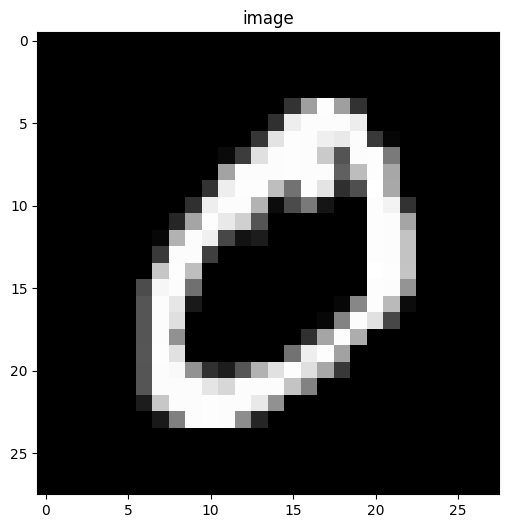

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#vi là dữ liệu  dtype=torch.uint8 ta sẽ biến đổi viết 1 hàm để đọc thay vì
#cv2.imshow() như thường lệ
def imgshow(title="",image = None,size = 6):
  w, h = image.shape[0],image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

image = trainset.data[1].numpy()
imgshow("image",image)

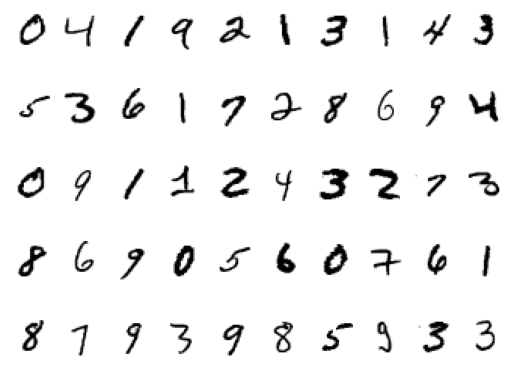

In [ ]:
# hiển thị nhiều ảnh bằng matplotlib
figure = plt.figure()
num = 50
for index in range(1,num+1):
  plt.subplot(5,10,index)
  plt.axis('off')
  plt.imshow(trainset.data[index],cmap='gray_r')

Vì không thể cho tất cả dữ liệu chạy 1 lần , nên chia ra làm nhiều đợt để chạy
là nhiều batches
- shuffle = True to prevent data sequence bias (xáo bài lên nào )

In [ ]:

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size =128,
                                          shuffle = True,
                                          num_workers =0)
testloader = torch.utils.data.DataLoader(testset,
                                          batch_size =128,
                                          shuffle = False,
                                          num_workers =0)


In [ ]:
# lặp qua từng batch để lấy dữ liệu
for images, labels in trainloader:
    print(images.shape)
    print(labels.shape)
    break  # Dừng sau khi lấy batch đầu tiên


torch.Size([128, 1, 28, 28])
torch.Size([128])


 Xây dựng model:
 - input image = (1,28,28),
 - conv1 = (32,26,26) + RELU ,
 - conv2 =(64,24,24) +  RELU ,
 - max Pool = (64,12,12) ,
 - Flatten =(9216,1),
 - FC = (128,1) ,
 - sorfmax = (10,1) .
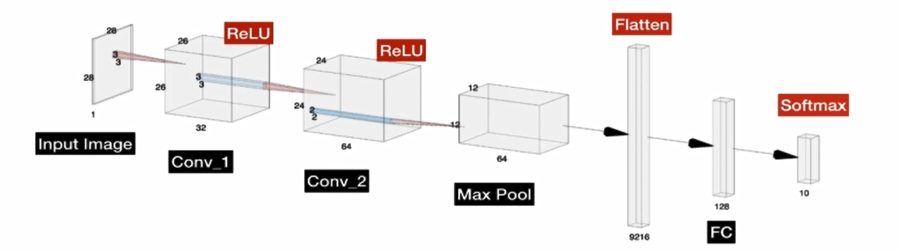


In [ ]:
# xay ham, ta chir mới định nghĩa model
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    #tao 1 lop con super ke thua nn.Module
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1,32,3)# input,output,kernel
    self.conv2 = nn.Conv2d(32,64,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(64*12*12,128)
    self.fc2 = nn.Linear(128,10)

  def forward(self,x):
    # chúng ta định nghĩa lan truyền thuận
    # Conv1 - Relu - Conv2 - Relu - MaxPool- Flatten - Fc1 -FC2
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1,64*12*12)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# thiết kế hàm Loss và Optimizer
# vì ta sẽ nhận diện 0 đến 9 nên dùng làm Loss : Cossentropy , Activation : Softmax
# sử dụng lr = 0.001 ; momentum = 0.9 ; có 3 loại gradient descent : mini-batch, batch,stochastic
# ta sẽ sử dụng stochastic gradient descent (SGD)
import torch.optim as optim # optimizer function

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.001,momentum=0.9)


sau quá trình thiết kế forward
- ta tiến hành code cập nhập gradient cho các trọng số
- Quy trình:
+ get mini_batch block consists of 128 inputs (our data) and their label
+ Initialise our Gradients with zero values
+Forward Propagate and get our Outputs
+ Use Outputs to get Loss
+ Back Propagate
+ Update Gradients using Optimizer

In [ ]:
epochs =10
epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
  print(f'Starting Epoch: {epoch+1}...')
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    #Forward -> Backprop + optimize
    outputs = net(inputs)
    loss = criterion(outputs,labels)#laay loss
    loss.backward()
    optimizer.step() #update weight
    running_loss += loss.item()
    if i % 50 == 49:
      correct =0
      total =0
      with torch.no_grad():
        for data in testloader:
          images,labels = data
          images = images.to(device)
          labels = labels.to(device)
          outputs = net(images)
          _,precdicted = torch.max(outputs.data,dim=1)
          total += labels.size(0)
          correct += (precdicted == labels).sum().item()
        accuracy = 100*correct / total
        epoch_num = epoch +1
        actual_loss = running_loss /50
        print(f'Epoch: {epoch_num},Mini_batches Completed: {(i+1)},Loss:{actual_loss:.3f},Test Accuracy = {accuracy:.3f}%')
        running_loss= 0.0
  epoch_log.append(epoch_num)
  loss_log.append(actual_loss)
  accuracy_log.append(accuracy)
print('Finished Training')

Starting Epoch: 1...
Epoch: 1,Mini_batches Completed: 50,Loss:2.270,Test Accuracy = 49.710%
Epoch: 1,Mini_batches Completed: 100,Loss:2.140,Test Accuracy = 56.680%
Epoch: 1,Mini_batches Completed: 150,Loss:1.753,Test Accuracy = 73.270%
Epoch: 1,Mini_batches Completed: 200,Loss:1.023,Test Accuracy = 83.640%
Epoch: 1,Mini_batches Completed: 250,Loss:0.587,Test Accuracy = 87.510%
Epoch: 1,Mini_batches Completed: 300,Loss:0.472,Test Accuracy = 88.510%
Epoch: 1,Mini_batches Completed: 350,Loss:0.420,Test Accuracy = 89.660%
Epoch: 1,Mini_batches Completed: 400,Loss:0.394,Test Accuracy = 89.690%
Epoch: 1,Mini_batches Completed: 450,Loss:0.364,Test Accuracy = 90.360%
Starting Epoch: 2...
Epoch: 2,Mini_batches Completed: 50,Loss:0.360,Test Accuracy = 91.100%
Epoch: 2,Mini_batches Completed: 100,Loss:0.333,Test Accuracy = 91.330%
Epoch: 2,Mini_batches Completed: 150,Loss:0.303,Test Accuracy = 91.810%
Epoch: 2,Mini_batches Completed: 200,Loss:0.300,Test Accuracy = 91.260%
Epoch: 2,Mini_batches Co

In [ ]:
import torch.optim as optim  # Import module optim từ PyTorch

# Định nghĩa hàm mất mát và bộ tối ưu hóa
criterion = nn.CrossEntropyLoss()  # Định nghĩa hàm mất mát Cross-Entropy
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  # Định nghĩa bộ tối ưu hóa (Stochastic Gradient Descent)

# Thiết lập số epoch (số vòng lặp) và tạo các biến ghi log
epochs = 10  # Số epoch (số vòng lặp) bạn muốn đào tạo trong ví dụ này
epoch_log = []  # Danh sách để lưu số epoch cho việc ghi log
loss_log = []  # Danh sách để lưu giá trị hàm mất mát cho việc ghi log
accuracy_log = []  # Danh sách để lưu giá trị độ chính xác cho việc ghi log

# Lặp qua các epoch đào tạo
for epoch in range(epochs):
    print(f'Bắt đầu Epoch: {epoch + 1}...')  # In ra số epoch hiện tại

    running_loss = 0.0  # Khởi tạo biến để theo dõi giá trị hàm mất mát đang chạy

    # Lặp qua các mini-batch dữ liệu
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data  # Lấy một mini-batch dữ liệu đầu vào và nhãn tương ứng

        inputs = inputs.to(device)  # Chuyển dữ liệu đầu vào lên GPU (nếu có)
        labels = labels.to(device)  # Chuyển nhãn lên GPU (nếu có)

        optimizer.zero_grad()  # Đặt đạo hàm của tất cả tham số về 0 để chuẩn bị cho quá trình backpropagation

        # Lan truyền tiến (Forward Pass)
        outputs = net(inputs)  # Đưa dữ liệu đầu vào qua mạng nơ-ron để tính toán đầu ra
        loss = criterion(outputs, labels)  # Tính giá trị hàm mất mát

        loss.backward()  # Thực hiện backpropagation để tính gradient (đạo hàm)
        optimizer.step()  # Cập nhật trọng số mạng bằng cách sử dụng optimizer

        running_loss += loss.item()  # Cộng giá trị hàm mất mát của mini-batch này vào biến running_loss

        if i % 50 == 49: #50 mini-batch để giảm tần suất ghi log và tăng hiệu suất tính toán.
            correct = 0  # Khởi tạo biến để đếm số dự đoán đúng
            total = 0  # Khởi tạo biến để đếm tổng số dự đoán

            # Đánh giá độ chính xác của mô hình trên dữ liệu kiểm tra
            with torch.no_grad(): #tắt việc tính toán gradient
                for data in testloader:
                    images, labels = data
                    images = images.to(device)
                    labels = labels.to(device)
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, dim=1) # dự đoán , predicted lưu nhãn có giá trị lớn nhất theo chiều dim = 1
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total  # Tính độ chính xác

                epoch_num = epoch + 1  # Lấy số epoch hiện tại
                actual_loss = running_loss / 50  # Tính giá trị hàm mất mát thực tế cho mini-batch
                print(f'Epoch: {epoch_num}, Các mini-batch đã hoàn thành: {(i + 1)}, Hàm Mất Mát: {actual_loss:.3f}, Độ Chính Xác Kiểm Tra: {accuracy:.3f}%')
                running_loss = 0.0  # Đặt lại giá trị hàm mất mát đang chạy để chuẩn bị cho các mini-batch tiếp theo

    epoch_log.append(epoch_num)  # Thêm số epoch hiện tại vào danh sách epoch_log
    loss_log.append(actual_loss)  # Thêm giá trị hàm mất mát thực tế vào danh sách loss_log
    accuracy_log.append(accuracy)  # Thêm độ chính xác vào danh sách accuracy_log

print('Hoàn Thành Đào Tạo')  # In ra "Hoàn Thành Đào Tạo" sau khi tất cả các epoch đã hoàn thành


In [ ]:
#lưu
PATH ='./mnist_cnn.pth'
torch.save(net.state_dict(),PATH)

RuntimeError: ignored

In [ ]:
!pwd

/content


In [ ]:
!cd /content/drive/MyDrive/ML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
